In [1]:
# Step 0: data warehouse or lake-> store both raw and deduplicated data (in our case-> GitHub raw data)
# data quality -> units, data type mismatches, datetime or currency

# Step 1: read the data -> read in correct schema

# Step 2: Exploratory data analysis-> look and visualize your data!

# Step 3: check data for quality- missing or null values, outliers, data imbalance for classes
# FIXING-> treat outliers and missing values-> either replace them or remove them or ignore them

# replace-> central tendencies (mean, median, mode)
# remove-> del entire row or column

# Missing values -> Missing at random, missing completely at random, missing not at random

# random -> unknown or inference
# data is known/unknown at training, but unknown at inference with independency between them
# -> Missing completely at random

# data is knonw/unknown at training, but unknown at inference with depency on missingness
# -> missing at random

# data is unknown at training, but known at inference with either dependence or independence
# -> missing not at random


# REPLACEMENT is usually avoided unless you are the SME
# prefer REMOVING

# Step 4: Featue selection and feature engineering
# do we need all the columns?

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/eybatch24june/main/data.csv')

In [3]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [4]:
# always check for class imbalance
# class imbalance-> find all discrete columns in your dataset; (not continuous)
for col_name in data.columns:
  print(col_name, data[col_name].nunique())
# from this we can see that only diagnosis column seems discrete, others are continuous

id 569
diagnosis 2
radius_mean 456
texture_mean 479
perimeter_mean 522
area_mean 539
smoothness_mean 474
compactness_mean 537
concavity_mean 537
concave points_mean 542
symmetry_mean 432
fractal_dimension_mean 499
radius_se 540
texture_se 519
perimeter_se 533
area_se 528
smoothness_se 547
compactness_se 541
concavity_se 533
concave points_se 507
symmetry_se 498
fractal_dimension_se 545
radius_worst 457
texture_worst 511
perimeter_worst 514
area_worst 544
smoothness_worst 411
compactness_worst 529
concavity_worst 539
concave points_worst 492
symmetry_worst 500
fractal_dimension_worst 535
Unnamed: 32 0


In [9]:
# see the distribution of values!
data['diagnosis'].value_counts()

# even though the count of malignant and benign are not same, they are sufficiently present
# and not extremely larger or smaller than each other

# no class imbalance detected!

diagnosis
B    357
M    212
Name: count, dtype: int64

Algorithm for synthetic data generation-> SMOTE

study material- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/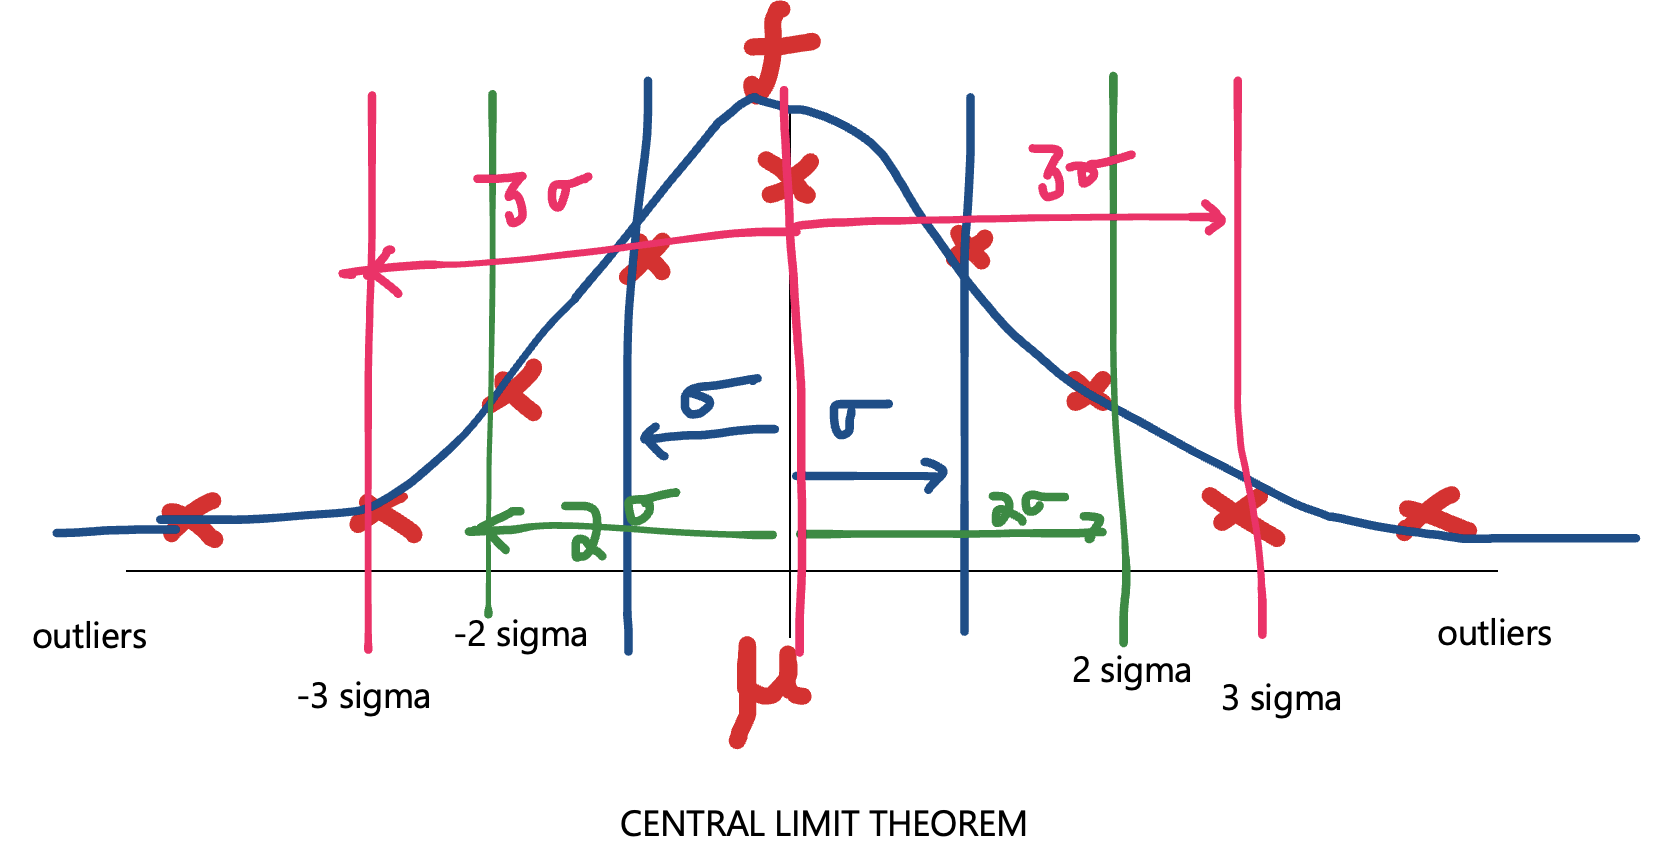

In [ ]:
# FEATURE SELECTION
# Correlations
# directly proportional, inversely, not proportional
# positive, negative or ZERO correlation

# positive-> if i increase, you increase. If i decrease, you decrease
# negative-> if i increase, you decrease. If i decrease, you increase
# ZERO -> if i increase or decrease, nothing happens to you!


# diagnosis = w1* radius + w2*texture +w3*smoothness ... + bias
# let's say that radius is directly proportional to diagnosis -> POSITIVE CORRELATION and a PLUS SIGN
# (wrong thing to say but for example only) smoothness is inversely proportional-> NEG CORRELATION and MINUS SIGN!

# Heatmap ->
#  ZERO CORRELATION -> tending to 0 correlations, that column should be ignored
#  POS and NEG -> both are considered
# if multiple columns have correlation of 1 or -1 -> consider only 1 of those columns, all may not be required!


In [14]:
one_zero_logic = lambda val: 1 if val == 'M' else 0
data2 = data.copy()
data2['diagnosis'] = data['diagnosis'].apply(one_zero_logic)
all_correlations = data2.corr()
data2.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


<Axes: >

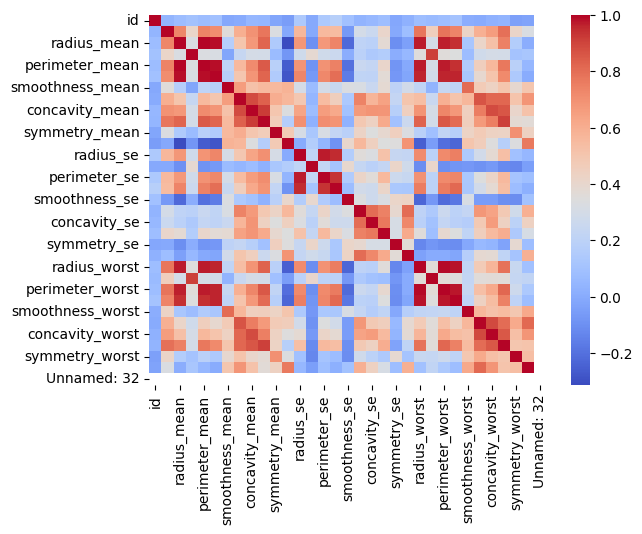

In [16]:
import seaborn as sns
sns.heatmap(all_correlations, cmap='coolwarm')

<ipython-input-44-18a4602f65f8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
<ipython-input-44-18a4602f65f8>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='b

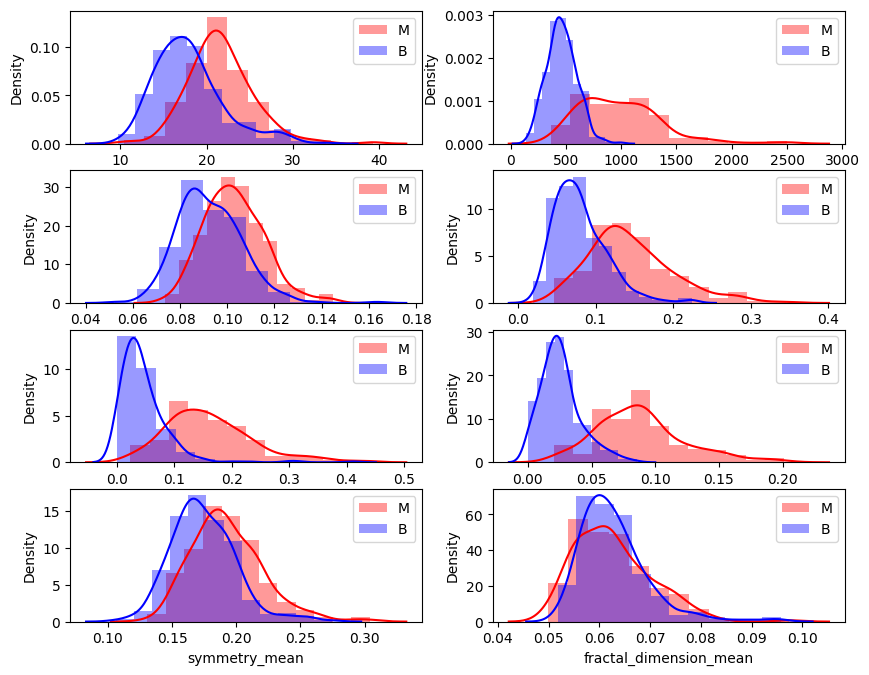

In [44]:
# pair plots
import matplotlib.pyplot as plt
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(xtrain.columns):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()

In [17]:
# From above graph-> ID has NO correlation with anyone!
# DIAGONAL is always 1 because its variable correlated with itself!

# RADIUS, PERIMITER and AREA-> 3 columns are showing 1 correlation because they are a formula!
# area-> pi * r * r
# perimeter-> 2 * pi * r

# any one of the 3 columns could have done the job!

In [18]:
# if we remove ID column, how do we know which row belongs to which patient?

# ID is needed, but SHOULD not participate in ML!

# set index-> as long as such as column has only unique values

data = data.set_index('id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
# we are not considering radius and perimeter because we are taking AREA instead
# all 3 had correlation of 1-> so we just need one of the three, not all

input_subset = ['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

label_column = ['diagnosis']

x = data.loc[:, input_subset]
y = data.loc[:, label_column]

In [26]:
x.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,
842302,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [27]:
y.head() # indexes of values from x and y should match!

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [28]:
encoding = { 'M':1, 'B':0}
logic = lambda val: encoding[val]
y['diagnosis'] = y['diagnosis'].apply(logic)
y.tail()

,diagnosis
id,
926424,1
926682,1
926954,1
927241,1
92751,0


In [30]:
# we should split the data between training and scoring
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [31]:
xtrain.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,
859471,17.33,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046
873593,26.57,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
859196,13.86,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963
88466802,25.22,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329
858970,14.88,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960


In [32]:
ytrain.head() # indexes should match xtrain

,diagnosis
id,
859471,0
873593,1
859196,0
88466802,0
858970,0


In [33]:
xtest.tail()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,
913102,16.85,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355
8610404,19.65,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391
884689,14.93,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168
883270,27.85,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129
88995002,31.12,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674


In [35]:
ytest.tail() # indexes should match xtest!

,diagnosis
id,
913102,0
8610404,1
884689,0
883270,0
88995002,1


In [36]:
# NORMALIZATION -> UNIFORMITY, PERPENDICULAR, SCALING

# MinMax -> min is set to 0, max is set to 1 and all values are scaled between 0 to 1
# min_max_scaled_values = (data -min ) / (max - min)

# Probability data -> 0 to 1, but with p(x) formula instead
# SIGMOID

# between -1 to 1
# TANH

# Z-Score -> where average value is taken into center, and all values are scaled with respect to
# average and standard deviation

# scaled_values = (data - mean) / standard_deviation
# if scaled_value is > 3 or less than -3 then we know it to be outlier

# outlier-> as a ML engineer IGNORE it or as a stats person, set it to MIN or MAX
# or don't even bother, just del those rows!

# for scaling-> calculate mu, sigma, min, max -> ONLY for training data
# then apply same values to the testing data also!


In [39]:
xtrain.describe().T # transpose to convert rows into columns and vice versa

,count,mean,std,min,25%,50%,75%,max
texture_mean,455.0,19.185033,4.266005,9.71000,16.170000,18.68000,21.585000,39.28000
area_mean,455.0,654.377582,354.943187,170.40000,420.300000,551.70000,767.600000,2501.00000
smoothness_mean,455.0,0.095744,0.013923,0.05263,0.085825,0.09462,0.104550,0.16340
compactness_mean,455.0,0.103619,0.052470,0.01938,0.062890,0.09097,0.131300,0.31140
concavity_mean,455.0,0.088898,0.079468,0.00000,0.029320,0.06154,0.132350,0.42680
concave points_mean,455.0,0.048280,0.038060,0.00000,0.020340,0.03341,0.073895,0.20120
symmetry_mean,455.0,0.181099,0.027487,0.11670,0.161850,0.17920,0.195800,0.30400
fractal_dimension_mean,455.0,0.062757,0.007210,0.04996,0.057645,0.06148,0.066100,0.09744


In [40]:
mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']

In [41]:
xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest - mu)/sigma

In [ ]:
# why should we normalize

# happiness = f(time, money) = w1*time + w2*money + bias
# weight and bias-> tiny numbers between (-1 to 1)

# min and max of age-> 0 to 100
# min and max of income-> -1billion to 1billion

# in some cases income could become a very large number, or too small
# thus skewing the entire equation in it's favor

# applying normalzation ensures that all columns are in the same scale
# z-score -> [-3,3] with outliers >3 or < -3
# minmax -> [0,1]
# sigmoid -> (0, 1)
# tanh -> (-1, 1)